<a href="https://colab.research.google.com/github/NooraAlsaiari077/DataMiningProject/blob/main/Phase_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


                              1. DATA CLASSIFICATION:

Shapes:
X: (770, 25)
y: (770,)

Split: Train=50% | Test=50% 

--- Training Decision Tree (GINI) ---
Accuracy: 1.0000
Confusion Matrix:
[[ 64   0]
 [  0 321]]


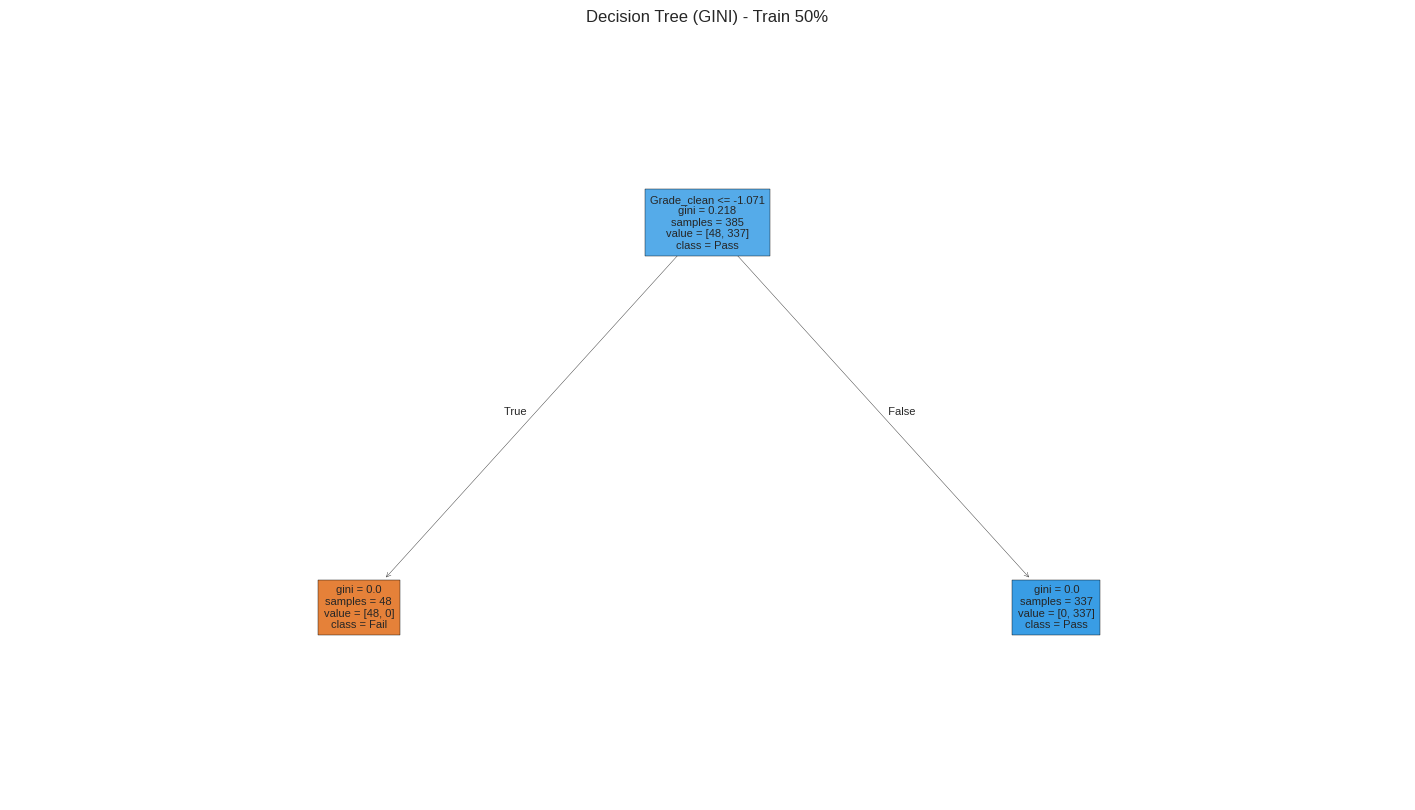


--- Training Decision Tree (ENTROPY) ---
Accuracy: 1.0000
Confusion Matrix:
[[ 64   0]
 [  0 321]]


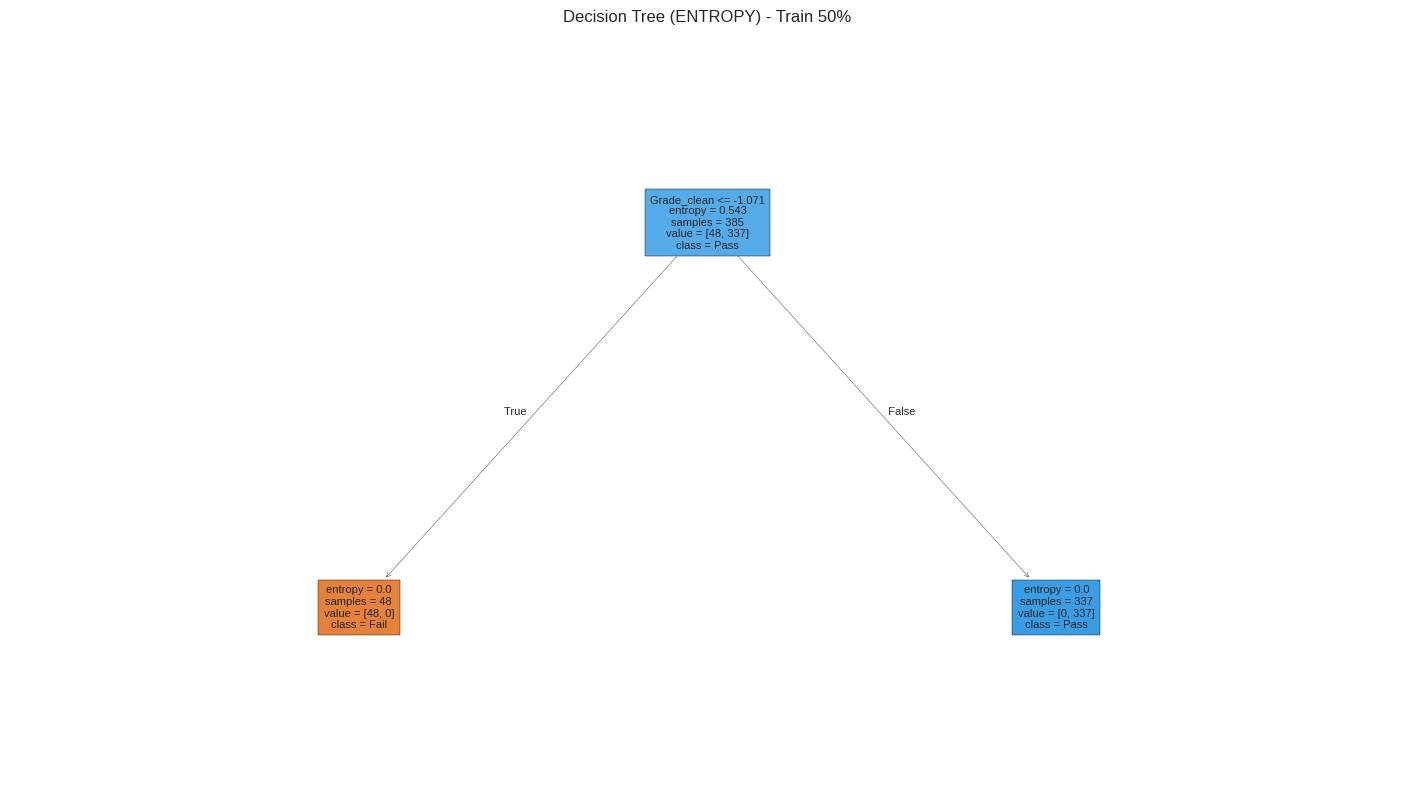


Split: Train=60% | Test=40% 

--- Training Decision Tree (GINI) ---
Accuracy: 1.0000
Confusion Matrix:
[[ 54   0]
 [  0 254]]


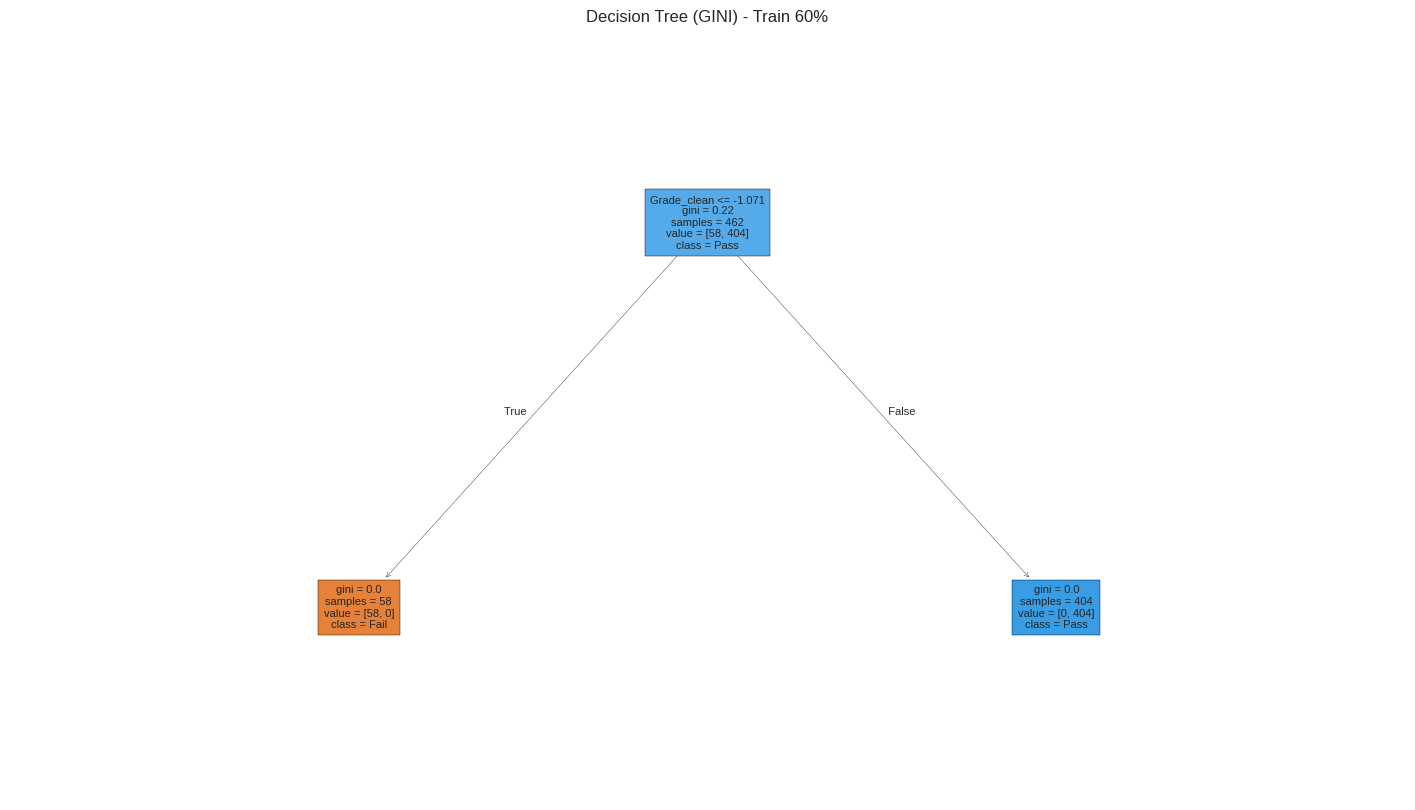


--- Training Decision Tree (ENTROPY) ---
Accuracy: 1.0000
Confusion Matrix:
[[ 54   0]
 [  0 254]]


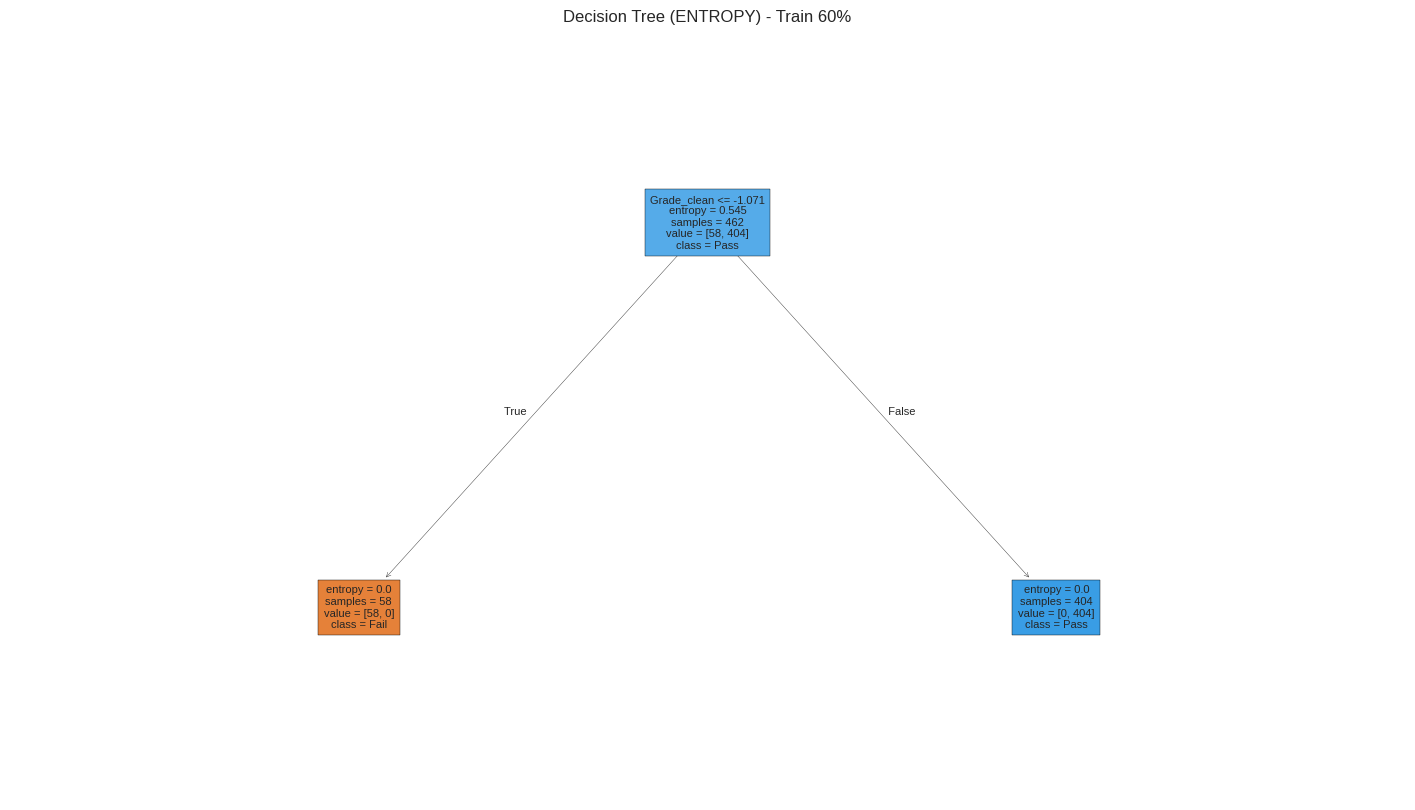


Split: Train=80% | Test=20% 

--- Training Decision Tree (GINI) ---
Accuracy: 1.0000
Confusion Matrix:
[[ 25   0]
 [  0 129]]


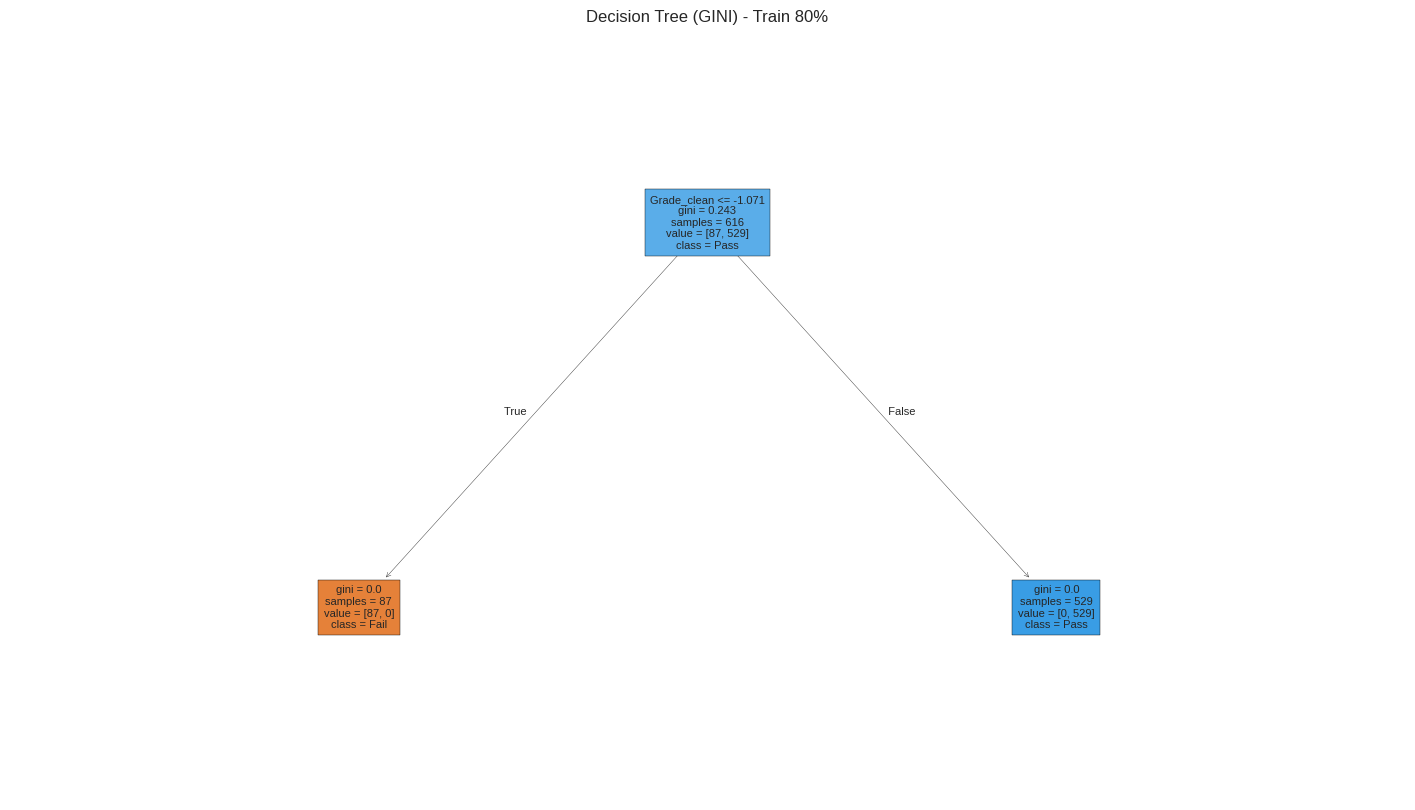


--- Training Decision Tree (ENTROPY) ---
Accuracy: 1.0000
Confusion Matrix:
[[ 25   0]
 [  0 129]]


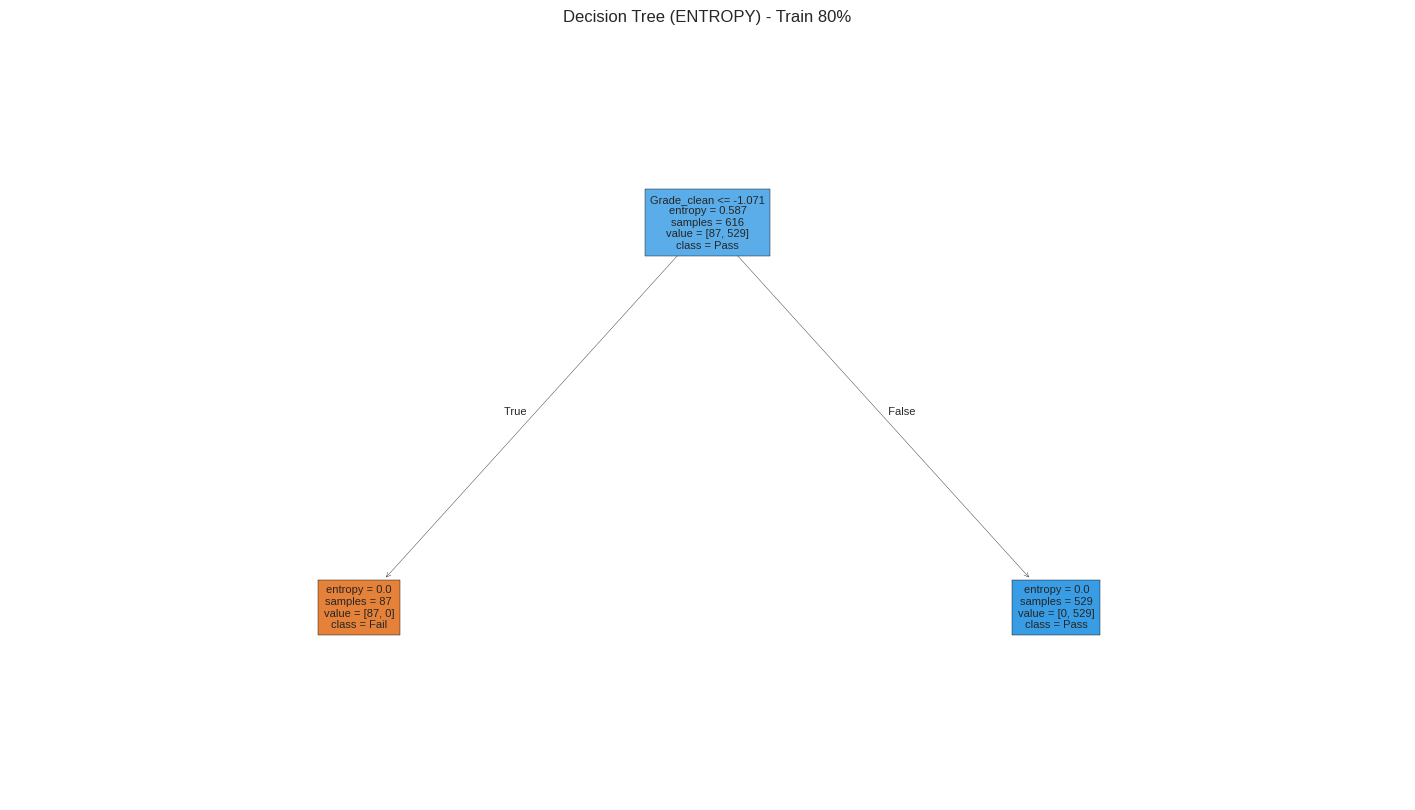



==================== FINAL RESULTS SUMMARY ====================
   Split Criterion  Accuracy
0  50/50      gini       1.0
1  50/50   entropy       1.0
2  60/40      gini       1.0
3  60/40   entropy       1.0
4  80/20      gini       1.0
5  80/20   entropy       1.0


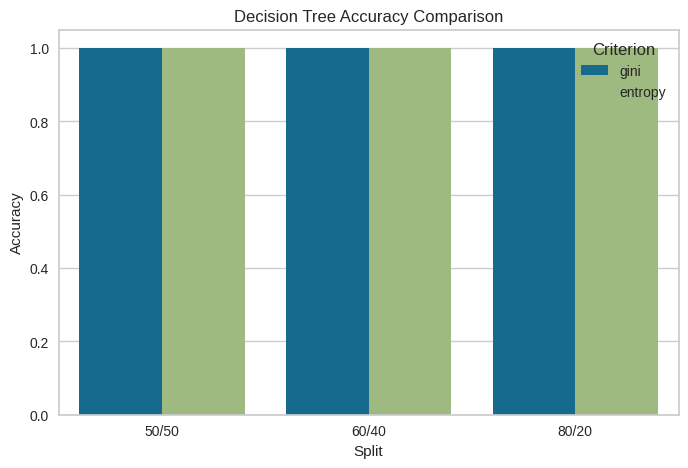

=== LOADING DATASET FROM GITHUB ===
Original data shape: (770, 28)

First few rows of original data:
   Playing Years  Playing Often  Playing Hours  Playing Games  Parent Revenue  \
0      -0.415542              2      -0.365234              1        2.033446   
1      -0.415542              3      -0.365234              1       -0.787731   
2      -1.126582              0      -1.113186              0       -0.787731   
3       1.006536              5      -0.365234              1        0.152661   
4      -0.415542              1       0.382718              1       -0.787731   

   Father Education  Mother Education  Grade percentage  Grade_clean  ...  \
0          0.240666          1.352074  77.50   7750,00%    -0.000199  ...   
1         -0.613309         -0.349065  83.00   8300,00%     0.333288  ...   
2         -0.613309         -0.349065  80.00   8000,00%     0.151386  ...   
3         -1.467284         -0.349065  45.00   4500,00%    -1.970807  ...   
4         -0.613309        

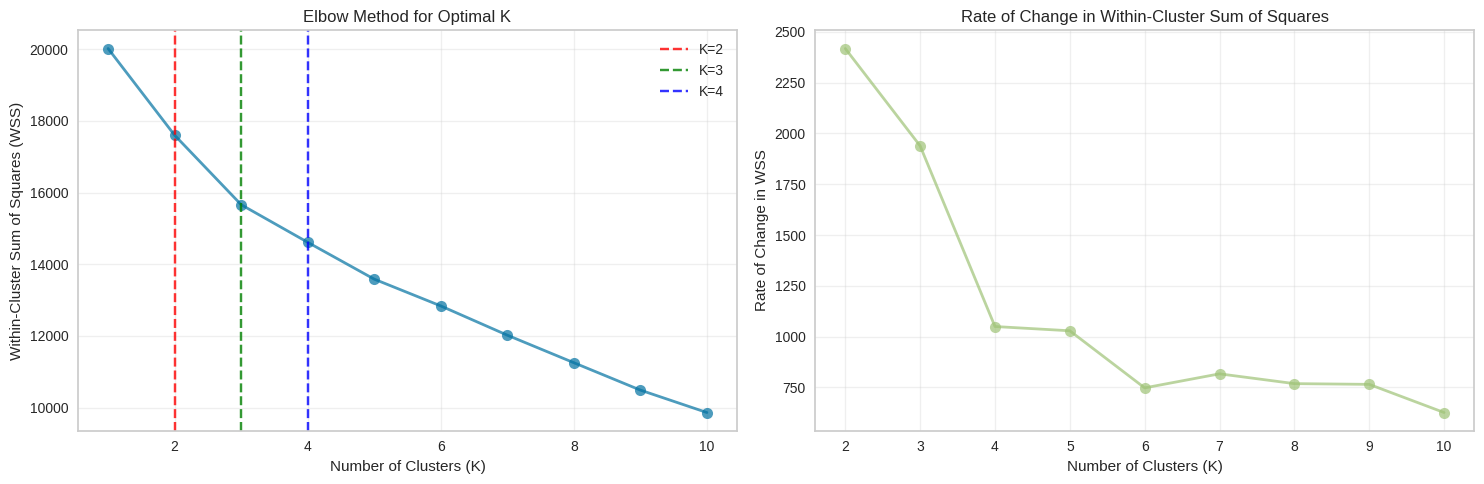

Suggested optimal K by elbow method: 3

=== SILHOUETTE COEFFICIENT ANALYSIS ===


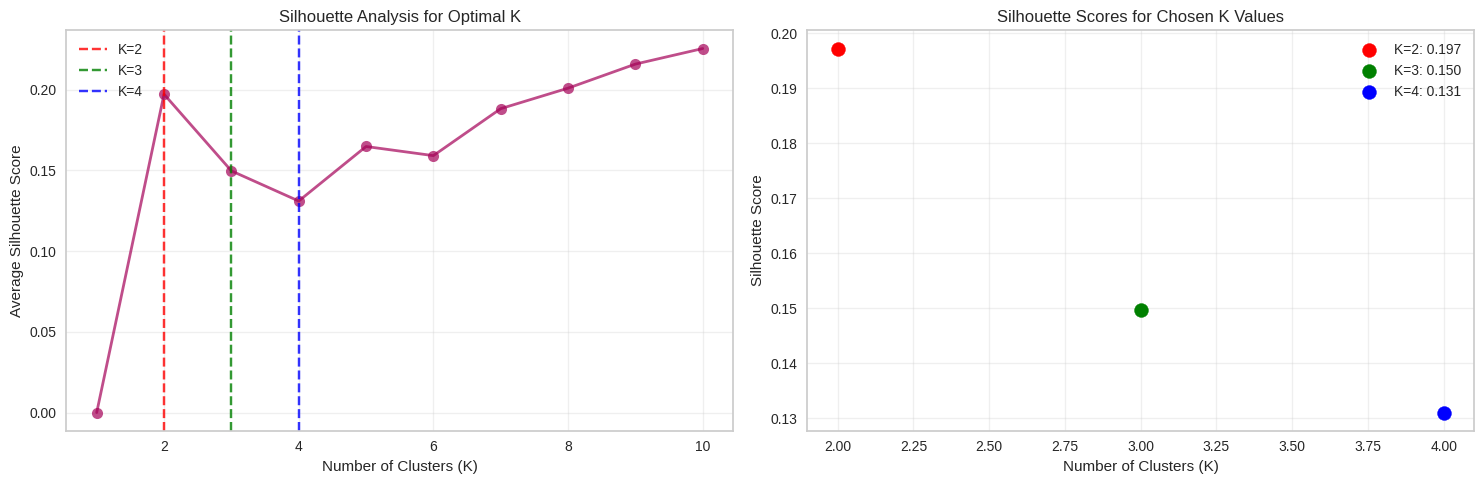


=== DETAILED SILHOUETTE VISUALIZATIONS ===


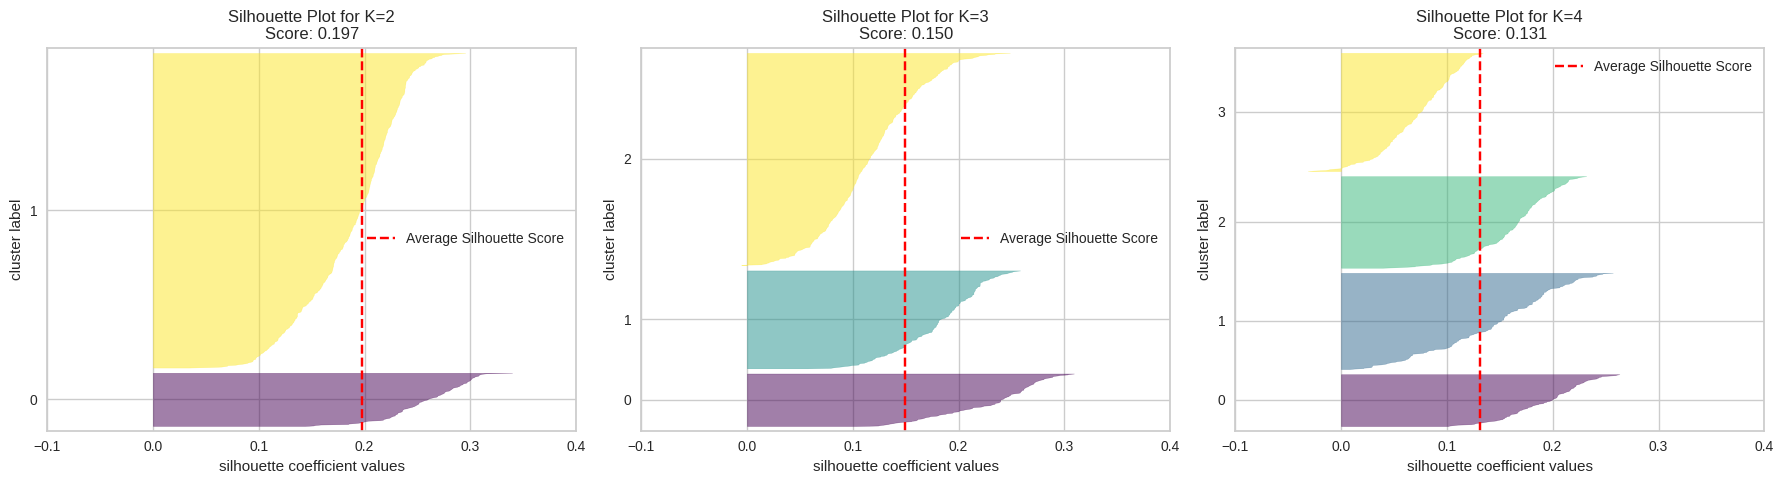


=== COMPARISON AND INTERPRETATION ===

Comparison of Results for Different K Values:
K    Silhouette Score   WSS             Recommended
------------------------------------------------------------
2    0.1973             17601.56        Best Silhouette
3    0.1498             15662.56        Elbow Suggested
4    0.1311             14613.19        -

=== FINAL INTERPRETATION ===
1. Silhouette Score Interpretation:
   - Scores range from -1 to 1
   > 0.7: Strong structure found
   0.5-0.7: Reasonable structure
   0.25-0.5: Weak structure
   < 0.25: No substantial structure

2. Elbow Method Interpretation:
   - Look for the 'bend' in the curve where WSS decrease slows down
   - Suggested optimal K: 3

3. Performance Summary:
   - Best silhouette score: K=2 (0.197)
   - Elbow suggested: K=3
CLUSTERING ANALYSIS - SIMPLE EXPLANATION

This analysis uses K-means clustering to discover natural groups 
in your customer data. Think of it as automatically finding different 
types of customers ba

In [8]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix

url = "https://raw.githubusercontent.com/NooraAlsaiari077/DataMiningProject/refs/heads/main/Dataset/Preprocessed_dataset%20(1).csv"

df = pd.read_csv(url)

# we fixed data values and type
df = df.replace({'%': ''}, regex=True)
df = df.replace({',': ''}, regex=True)
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='ignore')


print("\n" + "====================================================================================")
print("                              1. DATA CLASSIFICATION:")
print("====================================================================================")
# ---------------------------------------------------------------------------------------------------------------------------------
# 1. PREPARE FEATURES (X) AND TARGET (y)

y = df["Pass_Fail_Encoded"]
# Removing non-feature columns
X = df.drop(columns=["Pass_Fail", "Pass_Fail_Encoded", "Grade"])
print("\nShapes:")
print("X:", X.shape)
print("y:", y.shape)

# ----------------------------------------------------------------------------------------------------------------------------------
# 2. TRAIN DECISION TREES FOR 3 TRAIN/TEST SPLITS USING GINI + ENTROPY

splits = [(0.5, 0.5), (0.6, 0.4), (0.8, 0.2)]
results = []

#looping through training set
for train_size, test_size in splits:

    print(f"\nSplit: Train={train_size*100:.0f}% | Test={test_size*100:.0f}% ")

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=train_size, test_size=test_size, random_state=42
    )

    for criterion in ["gini", "entropy"]:

        print(f"\n--- Training Decision Tree ({criterion.upper()}) ---")

        model = DecisionTreeClassifier(criterion=criterion, random_state=42)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)

        results.append([f"{train_size*100:.0f}/{test_size*100:.0f}", criterion, acc])

        print(f"Accuracy: {acc:.4f}")
        print("Confusion Matrix:")
        print(cm)

        # The Tree
        plt.figure(figsize=(18, 10))
        plot_tree(
            model,
            filled=True,
            feature_names=X.columns,
            class_names=["Fail", "Pass"],
            fontsize=8
        )
        plt.title(f"Decision Tree ({criterion.upper()}) - Train {train_size*100:.0f}%")
        plt.show()

# --------------------------------------------------------------------------------------------------------------
# 3. RESULTS SUMMARY


results_df = pd.DataFrame(results, columns=["Split", "Criterion", "Accuracy"])
print("\n\n==================== FINAL RESULTS SUMMARY ====================")
print(results_df)
import seaborn as sns
plt.figure(figsize=(8,5))
sns.barplot(data=results_df, x="Split", y="Accuracy", hue="Criterion")
plt.title("Decision Tree Accuracy Comparison")
plt.show()




#The classification label Pass_Fail was generated directly from the cleaned grade using the rule: Pass_Fail = (Grade_clean >= 60)
#Since Grade_clean itself was included among the input features used for training (in X = df.drop(columns=["Pass_Fail", "Pass_Fail_Encoded", "Grade"])),
# the model simply learned the exact logical rule: if Grade_clean >= 60 → Pass  else → Fail
#Also the dataset contains no noise or contradictions, so the decision tree makes zero mistakes on all splits and for both criteria.
#For this reason, all models produce 100% accuracy.




# ===== INSTALL MISSING PACKAGE FIRST =====
!pip install kneed

# ===== 1. IMPORT REQUIRED LIBRARIES =====
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import SilhouetteVisualizer
from kneed import KneeLocator
import warnings
warnings.filterwarnings('ignore')

# ===== 2. LOAD AND PREPROCESS YOUR DATASET =====
print("=== LOADING DATASET FROM GITHUB ===")

# Load your dataset (using your friend's approach)
url = "https://raw.githubusercontent.com/NooraAlsaiari077/DataMiningProject/refs/heads/main/Dataset/Preprocessed_dataset%20(1).csv"
df = pd.read_csv(url)

print(f"Original data shape: {df.shape}")
print("\nFirst few rows of original data:")
print(df.head())

# Clean the data (remove % and , symbols, convert to numeric)
df = df.replace({'%': ''}, regex=True)
df = df.replace({',': ''}, regex=True)

for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='ignore')

print(f"\nAfter cleaning - data shape: {df.shape}")
print("\nData types after cleaning:")
print(df.dtypes)

# Select only numerical columns for clustering
numerical_cols = df.select_dtypes(include=[np.number]).columns
print(f"\nNumerical columns: {list(numerical_cols)}")

# Handle any missing values
df_clean = df[numerical_cols].dropna()
print(f"\nAfter removing missing values - data shape: {df_clean.shape}")

# Scale the data for clustering
scaler = StandardScaler()
preprocessed_data = scaler.fit_transform(df_clean)
preprocessed_data = pd.DataFrame(preprocessed_data, columns=df_clean.columns)

print("\n=== PREPROCESSED DATA READY FOR CLUSTERING ===")
print(f"Final preprocessed data shape: {preprocessed_data.shape}")
print("\nFirst few rows of scaled data:")
print(preprocessed_data.head())

# ===== 3. APPLY K-MEANS WITH THREE DIFFERENT K VALUES =====
k_values = [2, 3, 4]  # Three different sizes of K as required
print(f"\n=== APPLYING K-MEANS WITH K = {k_values} ===")

# Store results for each K
kmeans_models = {}
cluster_results = {}

for k in k_values:
    print(f"\n--- Clustering with K={k} ---")

    # Apply K-means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(preprocessed_data)

    # Calculate silhouette score
    sil_score = silhouette_score(preprocessed_data, cluster_labels)

    # Store results
    kmeans_models[k] = kmeans
    cluster_results[k] = {
        'labels': cluster_labels,
        'silhouette_score': sil_score,
        'inertia': kmeans.inertia_
    }

    print(f"Silhouette Score: {sil_score:.4f}")
    print(f"Within-cluster sum of squares: {kmeans.inertia_:.4f}")
    print(f"Cluster sizes: {np.bincount(cluster_labels)}")

# ===== 4. ELBOW METHOD ANALYSIS =====
print("\n=== ELBOW METHOD ANALYSIS ===")

# Calculate WSS for range of K values
k_range = range(1, 11)
wss_values = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(preprocessed_data)
    wss_values.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(15, 5))

# Subplot 1: Elbow Curve
plt.subplot(1, 2, 1)
plt.plot(k_range, wss_values, 'bo-', linewidth=2, markersize=8, alpha=0.7)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WSS)')
plt.title('Elbow Method for Optimal K')
plt.grid(True, alpha=0.3)

# Highlight our three chosen K values
colors = ['red', 'green', 'blue']
for i, k in enumerate(k_values):
    plt.axvline(x=k, color=colors[i], linestyle='--', alpha=0.8, label=f'K={k}')
plt.legend()

# Subplot 2: Rate of change in WSS
plt.subplot(1, 2, 2)
wss_diff = -np.diff(wss_values)
plt.plot(range(2, 11), wss_diff, 'go-', linewidth=2, markersize=8, alpha=0.7)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Rate of Change in WSS')
plt.title('Rate of Change in Within-Cluster Sum of Squares')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Automated elbow detection
kneedle = KneeLocator(list(k_range), wss_values, curve='convex', direction='decreasing')
print(f"Suggested optimal K by elbow method: {kneedle.elbow}")

# ===== 5. SILHOUETTE COEFFICIENT ANALYSIS =====
print("\n=== SILHOUETTE COEFFICIENT ANALYSIS ===")

# Calculate silhouette scores for different K values
silhouette_scores = []
for k in k_range:
    if k == 1:
        silhouette_scores.append(0)  # Silhouette score not defined for k=1
    else:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(preprocessed_data)
        silhouette_avg = silhouette_score(preprocessed_data, cluster_labels)
        silhouette_scores.append(silhouette_avg)

# Plot Silhouette Scores
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, silhouette_scores, 'mo-', linewidth=2, markersize=8, alpha=0.7)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Analysis for Optimal K')
plt.grid(True, alpha=0.3)

# Highlight our three chosen K values
for i, k in enumerate(k_values):
    plt.axvline(x=k, color=colors[i], linestyle='--', alpha=0.8, label=f'K={k}')
plt.legend()

# Detailed silhouette visualization for our three K values
plt.subplot(1, 2, 2)
for i, k in enumerate(k_values):
    if k > 1:
        plt.scatter(k, silhouette_scores[k-1], color=colors[i], s=100, label=f'K={k}: {silhouette_scores[k-1]:.3f}')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Chosen K Values')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ===== 6. DETAILED SILHOUETTE VISUALIZATIONS =====
print("\n=== DETAILED SILHOUETTE VISUALIZATIONS ===")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, k in enumerate(k_values):
    if k > 1:  # Silhouette plot requires k > 1
        visualizer = SilhouetteVisualizer(
            KMeans(n_clusters=k, random_state=42, n_init=10),
            ax=axes[i],
            colors='viridis'
        )
        visualizer.fit(preprocessed_data)
        visualizer.finalize()
        axes[i].set_title(f'Silhouette Plot for K={k}\nScore: {visualizer.silhouette_score_:.3f}')

plt.tight_layout()
plt.show()

# ===== 7. COMPARISON AND INTERPRETATION OF RESULTS =====
print("\n=== COMPARISON AND INTERPRETATION ===")
print("\nComparison of Results for Different K Values:")
print("=" * 60)
print(f"{'K':<4} {'Silhouette Score':<18} {'WSS':<15} {'Recommended'}")
print("-" * 60)

best_silhouette_k = k_values[np.argmax([cluster_results[k]['silhouette_score'] for k in k_values])]
elbow_k = kneedle.elbow

for k in k_values:
    silhouette = cluster_results[k]['silhouette_score']
    wss = cluster_results[k]['inertia']

    recommendations = []
    if k == best_silhouette_k:
        recommendations.append("Best Silhouette")
    if k == elbow_k:
        recommendations.append("Elbow Suggested")

    rec_text = ", ".join(recommendations) if recommendations else "-"
    print(f"{k:<4} {silhouette:<18.4f} {wss:<15.2f} {rec_text}")

print("=" * 60)

# ===== 8. FINAL INTERPRETATION AND RECOMMENDATION =====
print("\n=== FINAL INTERPRETATION ===")
print("1. Silhouette Score Interpretation:")
print("   - Scores range from -1 to 1")
print("   > 0.7: Strong structure found")
print("   0.5-0.7: Reasonable structure")
print("   0.25-0.5: Weak structure")
print("   < 0.25: No substantial structure")

print("\n2. Elbow Method Interpretation:")
print("   - Look for the 'bend' in the curve where WSS decrease slows down")
print(f"   - Suggested optimal K: {elbow_k}")

print("\n3. Performance Summary:")
max_silhouette_k = max(k_values, key=lambda x: cluster_results[x]['silhouette_score'])
print(f"   - Best silhouette score: K={max_silhouette_k} ({cluster_results[max_silhouette_k]['silhouette_score']:.3f})")
print(f"   - Elbow suggested: K={elbow_k}")



print("CLUSTERING ANALYSIS - SIMPLE EXPLANATION")
print("=" * 50)

print("""
This analysis uses K-means clustering to discover natural groups
in your customer data. Think of it as automatically finding different
types of customers based on their behavior and characteristics.

We test creating 2, 3, and 4 customer segments to see which works best.
The algorithm groups similar customers together and separates different ones.

We evaluate the results using two methods:
1. Elbow Method - Finds the optimal number of groups
2. Silhouette Score - Measures how well-separated the groups are

The visual charts will help you see the patterns and choose the best
way to segment your customers for business decisions.
""")

print("Starting analysis now...")
print("=" * 50)

